In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
test = jsm_models.LOAD_MODELS("../../../data/MW-analog/meta_data_psi4/")

In [4]:
first_row_mass = test.lgMh_models[0, :]
first_row_redshift = test.zacc_models[0, :]
mass = np.tile(first_row_mass, (test.lgMh_models.shape[0], 1))
redshift = np.tile(first_row_redshift, (test.lgMh_models.shape[0], 1))

In [5]:
#np.savez("../../../data/MW-analog/meta_data_psi4/unifrom/models.npz", mass = mass, redshift = redshift)

In [119]:
models = jsm_models.LOAD_MODELS_UNIFORM("../../../data/MW-analog/meta_data_psi4/unifrom/models.npz", Nsamples=1)

models_real = jsm_models.LOAD_MODELS("../../../data/MW-analog/meta_data_psi3/", Nsamples=1)

In [120]:
models.lgMh_models

array([[8.03323793, 8.02432753, 8.41233274, ...,        nan,        nan,
               nan],
       [8.03323793, 8.02432753, 8.41233274, ...,        nan,        nan,
               nan],
       [8.03323793, 8.02432753, 8.41233274, ...,        nan,        nan,
               nan],
       ...,
       [8.03323793, 8.02432753, 8.41233274, ...,        nan,        nan,
               nan],
       [8.03323793, 8.02432753, 8.41233274, ...,        nan,        nan,
               nan],
       [8.03323793, 8.02432753, 8.41233274, ...,        nan,        nan,
               nan]])

In [121]:
models_real.lgMh_models

array([[ 9.17210591,  9.24761723,  9.33293581, ...,         nan,
                nan,         nan],
       [ 9.81565526, 10.90517689,  9.17634023, ...,         nan,
                nan,         nan],
       [10.22863356,  9.20585348,  9.06239223, ...,         nan,
                nan,         nan],
       ...,
       [ 9.0835691 ,  9.68236066,  9.43068163, ...,         nan,
                nan,         nan],
       [10.48237619,  9.37173972,  9.44133688, ...,         nan,
                nan,         nan],
       [ 9.10543299, 10.75368299,  9.97359474, ...,         nan,
                nan,         nan]])

In [122]:
theta = [10.5, 4.8, 0.2, 0, 0, 0]

In [126]:
lgMs = jsm_SHMR.general(theta, models.lgMh_models, 0, 1)

lgMs_real = jsm_SHMR.general(theta, models_real.lgMh_models, 0, 1)

In [127]:
mass_rank = jsm_stats.N_rank(lgMs, threshold=6.5)

mass_rank_real = jsm_stats.N_rank(lgMs_real, threshold=6.5)

In [131]:
mass_rank.shape

(10000, 0)

In [116]:
models_real.get_stats(theta, 6.5, jsm_SHMR.general)

In [132]:
mass_rank_real.shape

(10000, 3)

In [50]:
models.stat.lgMs

array([[2.49829516, 2.58070872, 2.90802826, ...,        nan,        nan,
               nan],
       [2.32595426, 2.79670354, 3.17046366, ...,        nan,        nan,
               nan],
       [2.5730832 , 2.33208523, 3.69223459, ...,        nan,        nan,
               nan],
       ...,
       [2.16003483, 2.68395516, 3.48076327, ...,        nan,        nan,
               nan],
       [2.45839471, 2.72027586, 3.101761  , ...,        nan,        nan,
               nan],
       [2.36393484, 2.69480903, 3.01688402, ...,        nan,        nan,
               nan]])

In [41]:
models.stat.mass_rank

array([[8.22660368, 7.65790979, 7.35979634, ...,        nan,        nan,
               nan],
       [8.058484  , 7.8496236 , 7.34777566, ...,        nan,        nan,
               nan],
       [7.85088832, 7.78818932, 7.31816334, ...,        nan,        nan,
               nan],
       ...,
       [8.00645307, 7.88518854, 7.54750639, ...,        nan,        nan,
               nan],
       [7.83217922, 7.69889183, 7.46262573, ...,        nan,        nan,
               nan],
       [8.46323668, 8.22074116, 7.83285935, ...,        nan,        nan,
               nan]])

In [10]:
plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

fixed = [False, True, True, False, False, False]

In [15]:
alpha1 = jsm_mcmc.Chain("../../../data/alpha_permutations/mock_5/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

alpha2 = jsm_mcmc.Chain("../Feature_Recovery/alpha_permutations/mock_5/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=25)

In [22]:
alpha1.samples.shape

(21, 100, 6)

(array([ 1.,  0.,  1.,  0.,  2., 13., 41., 28.,  6.,  5.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.59060108, -0.21191862,  0.16676384,  0.5454463 ,  0.92412876,
         1.30281122,  1.68149368,  2.06017614,  2.4388586 ,  2.81754106,
         3.19622352,  3.57490598,  3.95358844,  4.3322709 ,  4.71095336,
         5.08963582,  5.46831828,  5.84700074,  6.2256832 ,  6.60436567,
         6.98304813]),
 <BarContainer object of 20 artists>)

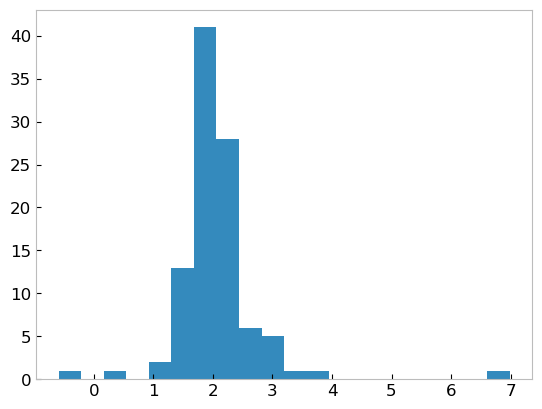

In [26]:
plt.hist(alpha1.samples[20, :, 1], bins=20)

In [28]:
alpha2.samples[29, :, 1]

array([1.75327704, 2.31723935, 1.82789479, 1.50202408, 3.79196256,
       1.47684884, 1.91387292, 2.34709747, 2.5906504 , 2.18469437,
       2.32795078, 1.56944316, 1.54392157, 1.94708357, 0.03288403])

In [29]:
alpha2.samples[29, :, 2]

array([1.59670696e-01, 1.13657260e-04, 5.70549437e-01, 1.91661950e-01,
       3.56598346e-01, 2.29206224e-01, 3.71582791e-01, 1.85282760e-02,
       1.61575597e-01, 2.20255902e-02, 8.22669304e-02, 8.07278840e-02,
       7.03638978e-01, 1.71857818e-01, 9.63278880e-02])

(array([1., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 1., 3., 1., 0., 0., 0.,
        0., 0., 1.]),
 array([0.03288403, 0.22083796, 0.40879189, 0.59674581, 0.78469974,
        0.97265367, 1.16060759, 1.34856152, 1.53651544, 1.72446937,
        1.9124233 , 2.10037722, 2.28833115, 2.47628507, 2.664239  ,
        2.85219293, 3.04014685, 3.22810078, 3.41605471, 3.60400863,
        3.79196256]),
 <BarContainer object of 20 artists>)

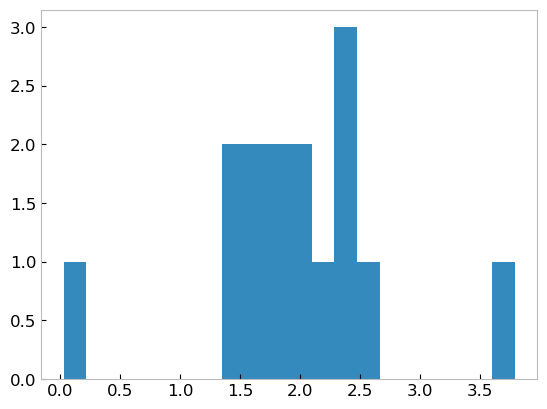

In [27]:
plt.hist(alpha2.samples[29, :, 1], bins=20)

In [23]:
for theta_i in alpha1.samples[20]:
    print(theta_i)
    models.get_stats(theta_i, 6.5, jsm_SHMR.general)

[10.5         2.53253182  0.07081302  0.          0.          0.        ]
[1.05000000e+01 2.00146128e+00 3.59394893e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[10.5         2.26041922  0.3778945   0.          0.          0.        ]
[10.5         2.27514529  0.25978792  0.          0.          0.        ]
[10.5         1.77206712  0.03731811  0.          0.          0.        ]
[10.5         2.34941224  0.01840749  0.          0.          0.        ]
[10.5         1.72772557  0.12435392  0.          0.          0.        ]
[10.5        -0.59060108  0.36439482  0.          0.          0.        ]
[10.5         2.15277493  0.444115    0.          0.          0.        ]
[10.5         2.14422286  0.08611523  0.          0.          0.        ]
[10.5         1.66275746  0.22427938  0.          0.          0.        ]
[10.5         1.78704369  0.25377911  0.          0.          0.        ]
[10.5         1.99596543  0.24103811  0.          0.          0.        ]
[10.5         2.264

KeyboardInterrupt: 